In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
df = pd.read_csv('/content/drive/MyDrive/2008_data_with_weather.csv')

In [6]:
df.head()

,UniqueCarrier,TailNum,Distance,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,...,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,conditions,description,icon,Arr_Delay_boolean
0,WN,N240WN,393,11.5,-2.3,4.1,11.5,-3.8,3.0,-7.9,...,16.0,NaN,NaN,NaN,NaN,0.85,Clear,Clear conditions throughout the day.,clear-day,1
1,WN,N523SW,441,11.5,-2.3,4.1,11.5,-3.8,3.0,-7.9,...,16.0,NaN,NaN,NaN,NaN,0.85,Clear,Clear conditions throughout the day.,clear-day,1
2,WN,N280WN,441,11.5,-2.3,4.1,11.5,-3.8,3.0,-7.9,...,16.0,NaN,NaN,NaN,NaN,0.85,Clear,Clear conditions throughout the day.,clear-day,0
3,WN,N308SA,848,11.5,-2.3,4.1,11.5,-3.8,3.0,-7.9,...,16.0,NaN,NaN,NaN,NaN,0.85,Clear,Clear conditions throughout the day.,clear-day,0
4,WN,N462WN,848,11.5,-2.3,4.1,11.5,-3.8,3.0,-7.9,...,16.0,NaN,NaN,NaN,NaN,0.85,Clear,Clear conditions throughout the day.,clear-day,1


In [4]:
df['Arr_Delay_boolean'] = (df['ArrDelay'] > 0).astype(int)

In [5]:
df.drop(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 
                  'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime',
                  'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime',
                  'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest',
                  'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 
                  'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
                  'SecurityDelay', 'LateAircraftDelay', 'datetime', 
                  'origin_state','sunrise','sunset','stations'], axis=1, inplace=True)

In [24]:
cols = df.columns.tolist()
cols_str = ', '.join(cols)
print(cols_str)

UniqueCarrier, TailNum, Distance, tempmax, tempmin, temp, feelslikemax, feelslikemin, feelslike, dew, humidity, precip, precipprob, precipcover, preciptype, snow, snowdepth, windgust, windspeed, winddir, sealevelpressure, cloudcover, visibility, solarradiation, solarenergy, uvindex, severerisk, moonphase, conditions, description, icon, Arr_Delay_boolean


In [25]:
# Assuming you have loaded the dataset in variable 'df'
# Fill missing numerical values with the mean
for column in df.select_dtypes(include=[np.number]).columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Fill missing string values with a default value
for column in df.select_dtypes(include=[object]).columns:
    df[column].fillna("unknown", inplace=True)

# Label encode categorical variables
for column in df.select_dtypes(include=[object]).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

# Separate features and target
X = df.drop("Arr_Delay_boolean", axis=1).values
y = df["Arr_Delay_boolean"].values

# Split the dataset into train and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



In [26]:
# Convert the dataset to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)  # Additional test set

# Set up the watchlist and train the model
watchlist = [(dtrain, "train"), (dval, "val")]
num_rounds = 20000  # Increase the number of rounds

model = xgb.train(
    params,
    dtrain,
    num_rounds,
    watchlist,
    early_stopping_rounds=10,
    verbose_eval=50
)

# Display the best iteration and corresponding validation logloss
best_iteration = model.best_iteration
best_val_logloss = model.best_score
print(f"Best Iteration: {best_iteration}, Best Validation Logloss: {best_val_logloss:.4f}")

# Calculate the test accuracy
y_test_pred = model.predict(dtest)
y_test_pred_rounded = np.round(y_test_pred)
test_accuracy = np.sum(y_test == y_test_pred_rounded) / len(y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:617: FutureWarning:

Pass `evals` as keyword args.



[0]	train-logloss:0.68869	val-logloss:0.68869
[50]	train-logloss:0.65042	val-logloss:0.65094
[100]	train-logloss:0.64284	val-logloss:0.64410
[150]	train-logloss:0.63800	val-logloss:0.63996
[200]	train-logloss:0.63461	val-logloss:0.63726
[250]	train-logloss:0.63162	val-logloss:0.63496
[300]	train-logloss:0.62903	val-logloss:0.63304
[350]	train-logloss:0.62680	val-logloss:0.63151
[400]	train-logloss:0.62492	val-logloss:0.63023
[450]	train-logloss:0.62326	val-logloss:0.62914
[500]	train-logloss:0.62166	val-logloss:0.62820
[550]	train-logloss:0.62036	val-logloss:0.62752
[600]	train-logloss:0.61880	val-logloss:0.62662
[650]	train-logloss:0.61739	val-logloss:0.62585
[700]	train-logloss:0.61627	val-logloss:0.62530
[750]	train-logloss:0.61525	val-logloss:0.62485
[800]	train-logloss:0.61396	val-logloss:0.62418
[850]	train-logloss:0.61292	val-logloss:0.62369
[900]	train-logloss:0.61195	val-logloss:0.62328
[950]	train-logloss:0.61086	val-logloss:0.62282
[1000]	train-logloss:0.60984	val-logloss:0.

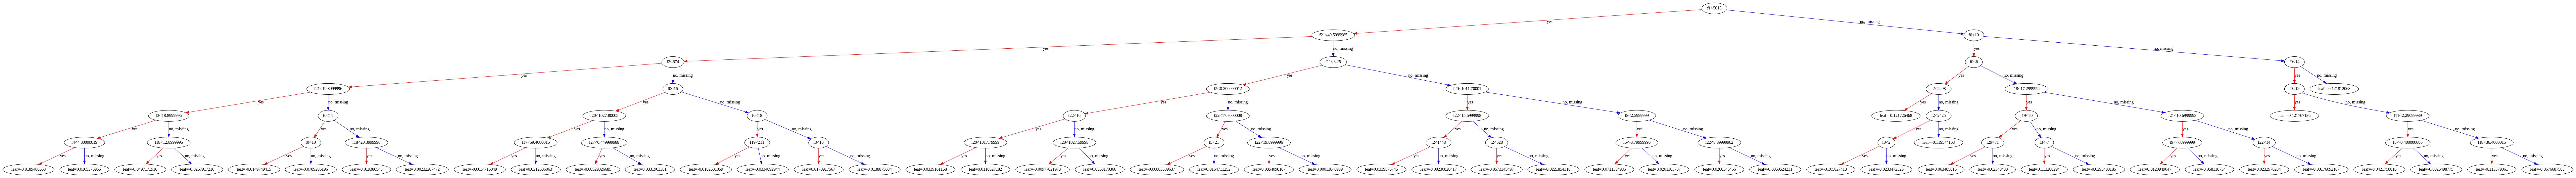

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(200, 200))
xgb.plot_tree(model, num_trees=10, ax=ax)
plt.show()